### Name : Aman kumar Gupta
### Roll No : BTech/25013/18
### Q1

## 1) Exploration of the data

###  a)	display the description of the data

In [29]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
#import useful package
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#for ML algo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

In [3]:
#read dataset
df = pd.read_csv("data/seedDataSet.csv")

In [4]:
df.head()

,area,perimeter,compactness,kernel_length,width,asy_coeff,grove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.describe()

,area,perimeter,compactness,kernel_length,width,asy_coeff,grove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### b)	display the heatmap to show the correlation between attributes.

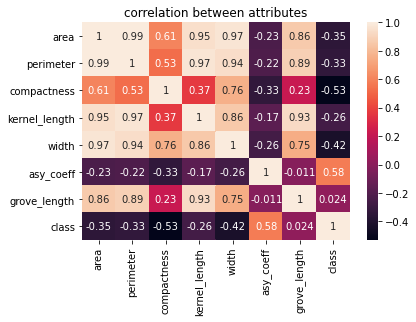

In [49]:
Var_Corr = df.corr()
ax = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
ax.set_title('correlation between attributes');

### c)	display vertical barplot for mean kernel length for each variety of the wheat

([<matplotlib.axis.XTick at 0x2050a7d4b20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

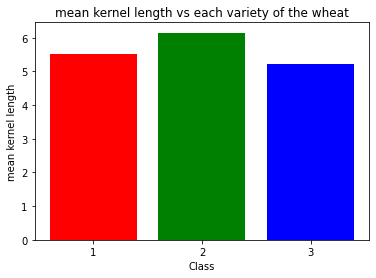

In [55]:
plt.bar(x = df['class'].unique(), height=df.groupby("class").kernel_length.mean().values,color = ["Red","Green","Blue"] )
plt.title("mean kernel length vs each variety of the wheat")
plt.xlabel("Class")
plt.ylabel("mean kernel length")
plt.xticks(df['class'].unique())

## 2)	Split the data set for training and testing in 70: 30 ratio.

In [20]:
X = df.drop("class", axis = 1)# drop output veriable column
Y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

### 3)	Show the classification report for each learning model

### a) Decision tree with entropy

In [ ]:
model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit(X_train,y_train)

In [26]:
y_pred_tree = model_tree.predict(X_test)

print("classification report fro Decision tree :-")
print(classification_report(y_test,y_pred_tree))

classification report fro Decision tree :-
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00        20
           3       0.91      0.91      0.91        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



### b) Logistic regression

In [30]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred_log = model_log.predict(X_test)

print("classification report fro Logestic regression :-")
print(classification_report(y_test,y_pred_log))

classification report fro Logestic regression :-
              precision    recall  f1-score   support

           1       0.87      0.95      0.91        21
           2       1.00      0.95      0.97        20
           3       0.95      0.91      0.93        22

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



## 4)	Show the confusion matrices for each learning model
### a) Decision tree with entropy

Confusion Metrix for Decision Tree: 
[[19  0  2]
 [ 0 20  0]
 [ 2  0 20]]


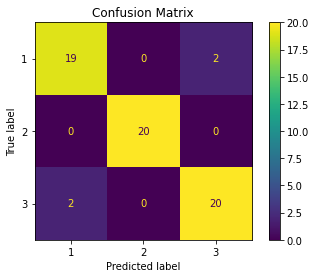

In [58]:
print("Confusion Metrix for Decision Tree: ")
print(confusion_matrix(y_test,y_pred_tree))
plot_confusion_matrix(model_tree, X_test, y_test) 
plt.title('Confusion Matrix')
plt.show()

### b) Logistic regression

Confusion Metrix for Logestic Regression: 
[[20  0  1]
 [ 1 19  0]
 [ 2  0 20]]


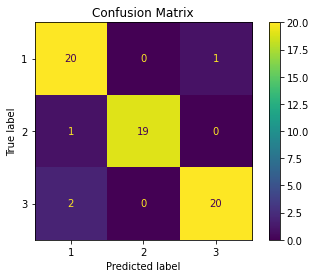

In [59]:
print("Confusion Metrix for Logestic Regression: ")
print(confusion_matrix(y_test,y_pred_log))

plot_confusion_matrix(model_log, X_test, y_test) 
plt.title('Confusion Matrix')
plt.show()

## 5)	Show the importance of features in case of logistic regression using horizontal barplot.

### a) Decision tree with entropy

In [37]:
print("Feature Importance for Decision tree  ")
print(model_tree.feature_importances_)


Feature Importance for Decision tree  
[0.26909771 0.04999407 0.         0.         0.04257943 0.08059397
 0.55773482]


Text(0.5, 1.0, 'Feature v/s Feature Importance ')

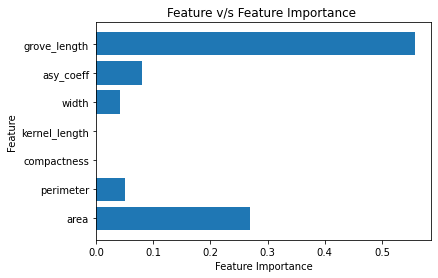

In [73]:
plt.barh(df.columns.values[:-1],model_tree.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature v/s Feature Importance ")

### b) Logistic regression

In [39]:
print("Feature Importance for Logestic  ")
print(model_log.coef_)

Feature Importance for Logestic  
[[ 0.33363649 -0.45240649  0.18979927  0.41474055  0.59836463 -0.59531714
  -1.60901772]
 [ 1.37094882  0.78008881 -0.14316228 -0.26894541 -0.26180798  0.15672437
   0.85553512]
 [-1.70458531 -0.32768232 -0.04663699 -0.14579514 -0.33655665  0.43859277
   0.75348259]]


Text(0.5, 1.0, 'Feature v/s Feature Importance for class 1 ')

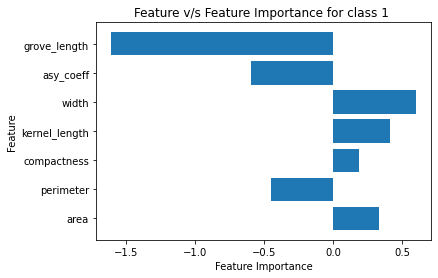

In [75]:
plt.barh(df.columns.values[:-1],model_log.coef_[0])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature v/s Feature Importance for class 1 ")

Text(0.5, 1.0, 'Feature v/s Feature Importance for class 2 ')

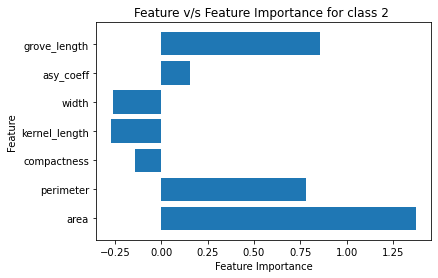

In [76]:
plt.barh(df.columns.values[:-1],model_log.coef_[1])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature v/s Feature Importance for class 2 ")

Text(0.5, 1.0, 'Feature v/s Feature Importance for class 3 ')

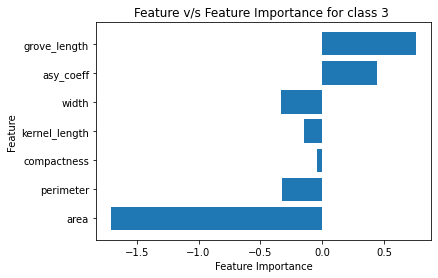

In [78]:
plt.barh(df.columns.values[:-1],model_log.coef_[2])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature v/s Feature Importance for class 3 ")

### 6)	Show the decision tree in case of decision tree algorithm

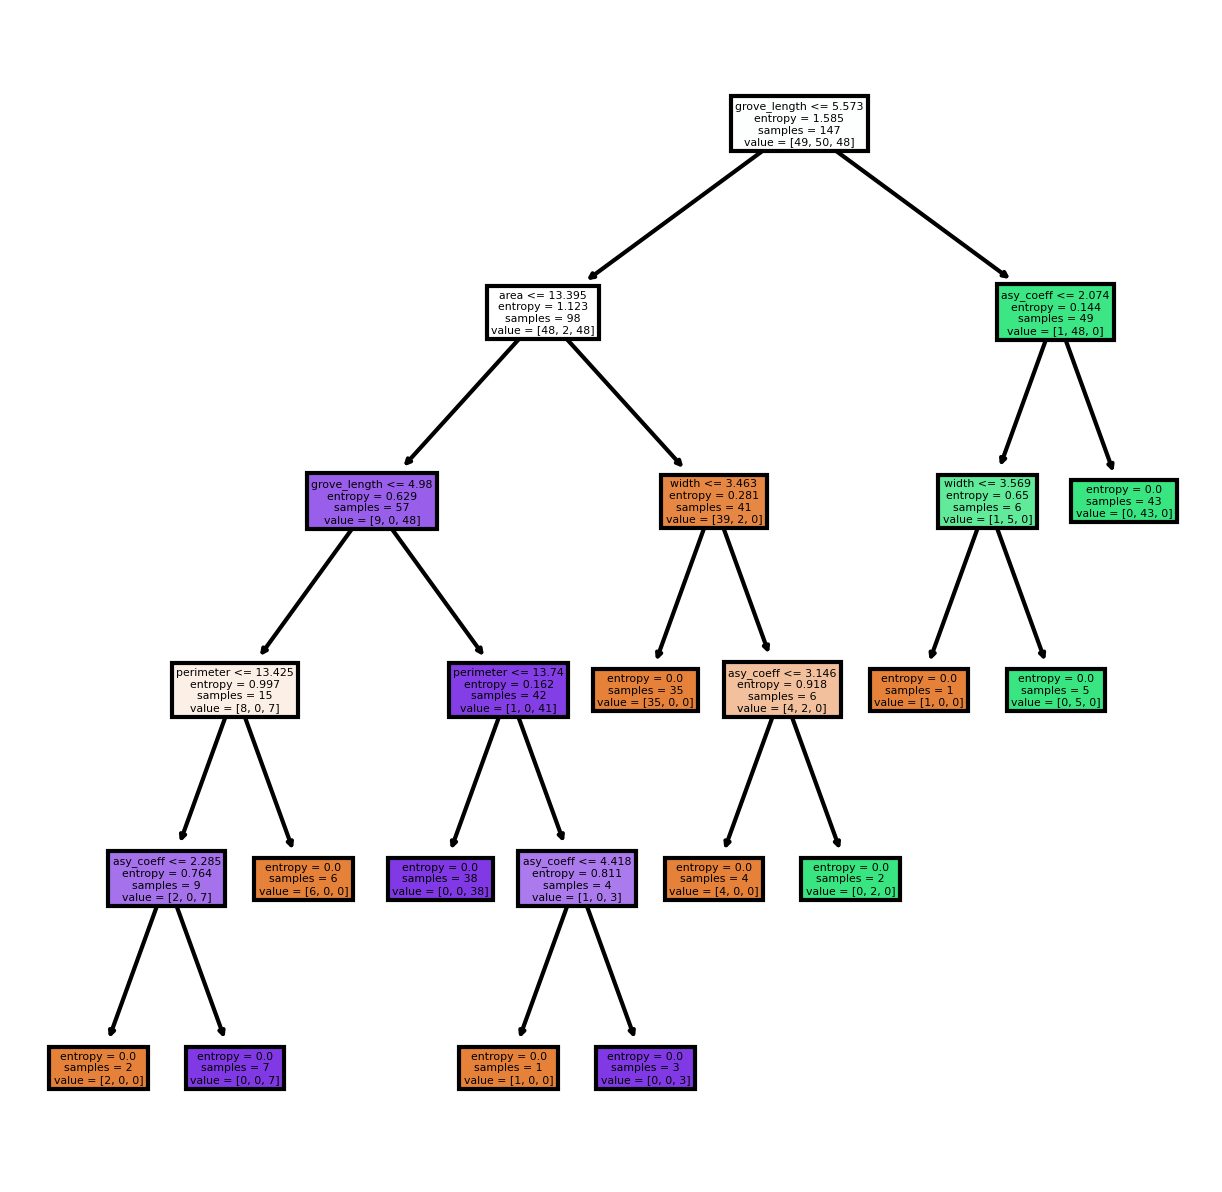

In [79]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(decision_tree=model_tree, filled=True, feature_names=df.columns.values[:-1]);

### 7)	Write the comments on the comparison of both the classifiers’ performance.

In [45]:
print(model_log.score(X_test,y_test)

0.9365079365079365

In [46]:
model_tree.score(X_test,y_test)

0.9365079365079365

As we can see that both model give same accurace score on the test set and on the classification report both have similar precision and f1 score so both model are sufficiently good performance on dataset.
And the score and f1 score are prety good and tending to 1. so both model are optimised and accurate.